<a href="https://colab.research.google.com/github/tarunchand/Intelligent-Systems/blob/main/Week_11_Assignment_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
myColumns = data.columns

In [ ]:
myColumns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print('File reading is done')

File reading is done


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import itertools

In [ ]:
def get_all_possible_subsets_from_features(min_subset_length, max_subset_length, features):
  # Returns all subsets of size between min subset length and max subset length from features 
  final_list = []
  for i in range(min_subset_length, max_subset_length + 1):
    combinations = itertools.combinations(features, i)
    for subset in combinations:
      final_list.append(list(subset))
  return final_list

In [ ]:
possible_feature_combinations = get_all_possible_subsets_from_features(5, len(myColumns) - 1, myColumns[0:-1])

In [ ]:
possible_feature_combinations

[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'],
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'DiabetesPedigreeFunction'],
 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age'],
 ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'Insulin',
  'DiabetesPedigreeFunction'],
 ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'Age'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'BMI',
  'DiabetesPedigreeFunction'],
 ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'Age'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'DiabetesPedigreeFunction',
  'Age'],
 ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI'],
 ['Pregnancies',
  'Glucose',
  'SkinThickness',
  'Insulin',
  'DiabetesPedigreeFunction'],
 ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'Age'],
 ['Preg

In [ ]:
# Calculating accuracy with all feature combinations to find the best accuracy (Feature Selection)
max_accuracy = 0
feature_with_max_accuracy = []
optimal_depth = 0
accuracy_plot = dict()
for i in range(1, 10):
  accuracy_plot[i] = 0
for feature_cols in possible_feature_combinations:
  X = data[feature_cols]
  Y = data['Outcome']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1)
  # Calculating accuracy with different max depths from 1 to 100 of Decision Tree to find the best accuracy (Parameter Tuning)
  for depth in range(1, 10):
    myDT = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    myDT = myDT.fit(X_train, Y_train)
    Y_pred = myDT.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, Y_pred) * 100
    accuracy_plot[depth] = max(accuracy_plot[depth], accuracy)
    if accuracy > max_accuracy:
      max_accuracy = accuracy
      feature_with_max_accuracy = feature_cols
      optimal_depth = depth
print('Max Accuracy is ' + str(max_accuracy) + ' with features ' + str(feature_with_max_accuracy) + ' with optimal depth ' + str(optimal_depth))

Max Accuracy is 80.08658008658008 with features ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] with optimal depth 7


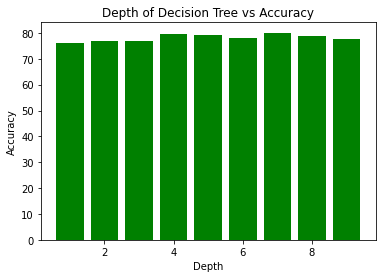

In [ ]:
import matplotlib.pyplot as plt
x_axis_depth = accuracy_plot.keys()
y_axis_accuracy = accuracy_plot.values()

plt.bar(x_axis_depth, y_axis_accuracy, color='green')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Depth of Decision Tree vs Accuracy")
plt.show()

In [ ]:
pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert --to html /content/Week_11_Assignment_IS.ipynb

[NbConvertApp] Converting notebook /content/Week_11_Assignment_IS.ipynb to html
[NbConvertApp] Writing 319649 bytes to /content/Week_11_Assignment_IS.html
